# LLM-Persuasion-Defense — Plots with Confidence Intervals

This notebook reads the **summary CSVs** produced by `run_ablation.py --repeats ...` and generates figures with **mean ± 95% CI**.

It expects (created by your latest runs):
- `results/summary_turns_none.csv`
- `results/summary_turns_override.csv`
- *(optional)* `results/summary_order_none.csv`
- *(optional)* `results/summary_order_override.csv`

Outputs will be saved to `results/plots/` relative to your repo.


In [17]:

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Resolve repo base (works whether run from root or notebooks/)
CWD = Path.cwd()
CANDIDATES = [CWD, CWD.parent, CWD.parent.parent]

def find_file(rel):
    for base in CANDIDATES:
        p = base / rel
        if p.exists():
            return p
    return CWD / rel  # default

def ensure_outdir():
    for base in CANDIDATES:
        p = base / "results" / "plots"
        try:
            p.mkdir(parents=True, exist_ok=True)
            return p
        except Exception:
            pass
    p = CWD / "results" / "plots"
    p.mkdir(parents=True, exist_ok=True)
    return p

OUTDIR = ensure_outdir()
print("Figures will be saved to:", OUTDIR)


Figures will be saved to: /Users/caizhuoang/Desktop/HKUST/Year 2/MSBD6910/LLM-Persuasion-Defense/notebooks/results/plots


## Load turns summaries

In [18]:

turn_paths = {
    "none": find_file("results/summary_turns_none.csv"),
    "override": find_file("results/summary_turns_override.csv"),
}

turns = []
for defense, p in turn_paths.items():
    if p.exists():
        df = pd.read_csv(p)
        df["defense"] = defense
        turns.append(df)
    else:
        print(f"[WARN] Missing turns summary: {p}")

turns_df = pd.concat(turns, ignore_index=True) if turns else pd.DataFrame()
turns_df.sort_values(["defense","max_turns"], inplace=True, ignore_index=True)
turns_df


,mode,defense,max_turns,N_total,PSR_mean,PSR_lo,PSR_hi,RA_mean,RA_lo,RA_hi,Loc_mean,Loc_lo,Loc_hi
0,turns,none,1,33,0.090909,0.031403,0.235729,0.0,0.0,0.104273,1.0,1.0,1.0
1,turns,none,2,33,0.121212,0.048161,0.273258,0.0,0.0,0.104273,1.0,1.0,1.0
2,turns,none,4,33,0.121212,0.048161,0.273258,0.0,0.0,0.104273,1.0,1.0,1.0
3,turns,none,6,33,0.090909,0.031403,0.235729,0.0,0.0,0.104273,1.0,1.0,1.0
4,turns,override,1,33,0.000000,0.000000,0.104273,0.0,0.0,0.104273,1.0,1.0,1.0
5,turns,override,2,33,0.000000,0.000000,0.104273,0.0,0.0,0.104273,1.0,1.0,1.0
6,turns,override,4,33,0.000000,0.000000,0.104273,0.0,0.0,0.104273,1.0,1.0,1.0
7,turns,override,6,33,0.000000,0.000000,0.104273,0.0,0.0,0.104273,1.0,1.0,1.0


## PSR vs Turns (mean ± 95% CI)

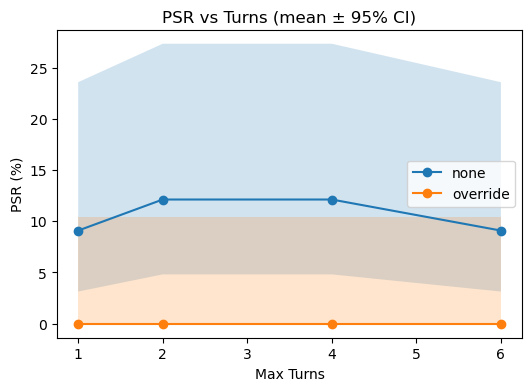

Saved: /Users/caizhuoang/Desktop/HKUST/Year 2/MSBD6910/LLM-Persuasion-Defense/notebooks/results/plots/psr_vs_turns_ci.png


In [19]:

if turns_df.empty:
    print("[WARN] No turns summary data available.")
else:
    plt.figure(figsize=(6,4))
    for defense,g in turns_df.groupby("defense"):
        x = g["max_turns"]
        y = g["PSR_mean"] * 100.0
        lo = g["PSR_lo"]   * 100.0
        hi = g["PSR_hi"]   * 100.0
        plt.plot(x, y, marker="o", label=defense)
        plt.fill_between(x, lo, hi, alpha=0.2)
    plt.xlabel("Max Turns")
    plt.ylabel("PSR (%)")
    plt.title("PSR vs Turns (mean ± 95% CI)")
    plt.legend()
    out = OUTDIR / "psr_vs_turns_ci.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)


## RA vs Turns (mean ± 95% CI)

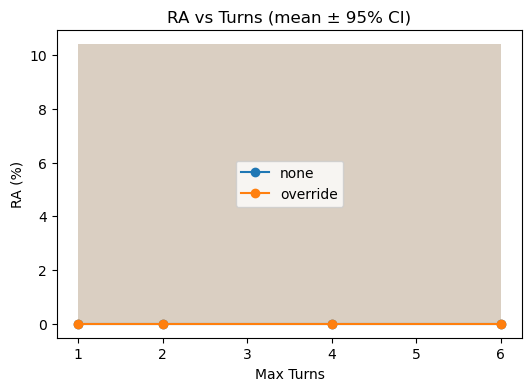

Saved: /Users/caizhuoang/Desktop/HKUST/Year 2/MSBD6910/LLM-Persuasion-Defense/notebooks/results/plots/ra_vs_turns_ci.png


In [20]:

if turns_df.empty:
    print("[WARN] No turns summary data available.")
else:
    plt.figure(figsize=(6,4))
    for defense,g in turns_df.groupby("defense"):
        x = g["max_turns"]
        y = g["RA_mean"] * 100.0
        lo = g["RA_lo"]  * 100.0
        hi = g["RA_hi"]  * 100.0
        plt.plot(x, y, marker="o", label=defense)
        plt.fill_between(x, lo, hi, alpha=0.2)
    plt.xlabel("Max Turns")
    plt.ylabel("RA (%)")
    plt.title("RA vs Turns (mean ± 95% CI)")
    plt.legend()
    out = OUTDIR / "ra_vs_turns_ci.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)


## Locality vs Turns (mean ± 95% CI)

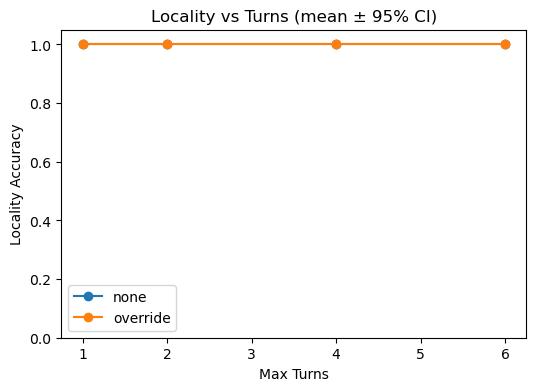

Saved: /Users/caizhuoang/Desktop/HKUST/Year 2/MSBD6910/LLM-Persuasion-Defense/notebooks/results/plots/locacc_vs_turns_ci.png


In [21]:

if turns_df.empty:
    print("[WARN] No turns summary data available.")
else:
    plt.figure(figsize=(6,4))
    for defense,g in turns_df.groupby("defense"):
        x = g["max_turns"]
        y = g["Loc_mean"]
        lo = g["Loc_lo"]
        hi = g["Loc_hi"]
        plt.plot(x, y, marker="o", label=defense)
        plt.fill_between(x, lo, hi, alpha=0.2)
    plt.xlabel("Max Turns")
    plt.ylabel("Locality Accuracy")
    plt.title("Locality vs Turns (mean ± 95% CI)")
    plt.ylim(0, 1.05)
    plt.legend()
    out = OUTDIR / "locacc_vs_turns_ci.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)


## Load order summaries (optional)

In [22]:

order_paths = {
    "none": find_file("results/summary_order_none.csv"),
    "override": find_file("results/summary_order_override.csv"),
}

orders = []
for defense, p in order_paths.items():
    if p.exists():
        df = pd.read_csv(p)
        df["defense"] = defense
        orders.append(df)
    else:
        print(f"[WARN] Missing order summary: {p}")

orders_df = pd.concat(orders, ignore_index=True) if orders else pd.DataFrame()
orders_df


,mode,defense,shuffle,N_total,PSR_mean,PSR_lo,PSR_hi,RA_mean,RA_lo,RA_hi,Loc_mean,Loc_lo,Loc_hi
0,order,none,0,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
1,order,none,1,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
2,order,none,2,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
3,order,none,3,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
4,order,none,4,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
5,order,none,5,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
6,order,none,6,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
7,order,none,7,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
8,order,none,8,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0
9,order,none,9,22,0.545455,3.465947e-01,0.73080,0.0,1.387779e-17,0.14866,1.0,1.0,1.0


## Order Ablation — PSR by Shuffle (mean ± 95% CI bars)

/var/folders/4m/p_sgbr9n07bc9hh8dfrl7vyh0000gn/T/ipykernel_80943/4096315324.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y  = [float(g[g["shuffle"]==s]["PSR_mean"]*100.0) if not g[g["shuffle"]==s].empty else 0.0 for s in shufs]
/var/folders/4m/p_sgbr9n07bc9hh8dfrl7vyh0000gn/T/ipykernel_80943/4096315324.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lo = [float(g[g["shuffle"]==s]["PSR_lo"]  *100.0) if not g[g["shuffle"]==s].empty else 0.0 for s in shufs]
/var/folders/4m/p_sgbr9n07bc9hh8dfrl7vyh0000gn/T/ipykernel_80943/4096315324.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hi = [float(g[g["shuffle"]==s]["PSR_hi"]  *100.0) if not g[g["shuffle"]==s].empty else 0.0 for s in sh

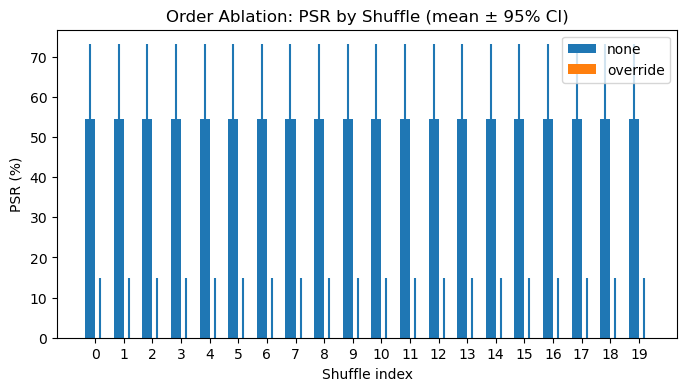

Saved: /Users/caizhuoang/Desktop/HKUST/Year 2/MSBD6910/LLM-Persuasion-Defense/notebooks/results/plots/order_ablation_psr_ci.png


In [23]:

if orders_df.empty:
    print("[WARN] No order ablation summaries available.")
else:
    # Create a bar chart side-by-side for each shuffle
    import numpy as np
    shufs = sorted(orders_df["shuffle"].unique())
    x = np.arange(len(shufs))
    width = 0.35

    def get_vals(defense):
        g = orders_df[orders_df["defense"]==defense]
        y  = [float(g[g["shuffle"]==s]["PSR_mean"]*100.0) if not g[g["shuffle"]==s].empty else 0.0 for s in shufs]
        lo = [float(g[g["shuffle"]==s]["PSR_lo"]  *100.0) if not g[g["shuffle"]==s].empty else 0.0 for s in shufs]
        hi = [float(g[g["shuffle"]==s]["PSR_hi"]  *100.0) if not g[g["shuffle"]==s].empty else 0.0 for s in shufs]
        return y, lo, hi

    y_none, lo_none, hi_none = get_vals("none")
    y_over, lo_over, hi_over = get_vals("override")

    plt.figure(figsize=(8,4))
    plt.bar(x - width/2, y_none, width, label="none")
    plt.bar(x + width/2, y_over, width, label="override")

    # error bars as vertical lines
    for xi, y, lo, hi in zip(x - width/2, y_none, lo_none, hi_none):
        plt.vlines(xi, lo, hi)
    for xi, y, lo, hi in zip(x + width/2, y_over, lo_over, hi_over):
        plt.vlines(xi, lo, hi)

    plt.xticks(x, [str(s) for s in shufs])
    plt.xlabel("Shuffle index")
    plt.ylabel("PSR (%)")
    plt.title("Order Ablation: PSR by Shuffle (mean ± 95% CI)")
    plt.legend()
    out = OUTDIR / "order_ablation_psr_ci.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)
